In [1]:
from utils import *
from matplotlib import pyplot as plt

In [2]:
# 0. Configuration Settings
which_dataset = 4    # 'iris'=0 'crop'=1 'adult'=2 'breast'=3 'nursery'=4 'mushroom'=5

which_model = 1      # 'Decision_Tree' = 0, 'Logistic_Regression = 1', 'Multinomial_Naive_Bayes=2',
                     # 'K_Nearest_Neeighbor = 3', 'Random_Forest = 4', 'Multilayer_Perceptron = 5'

explanation_tool = 0 # 'Lime=0' 'Shap=1'

In [3]:
# This is the number of auxiliary datasets to experiment on. 
# Lower the number for a lower runtime.
how_many_sets = 10

# Size of auxiliary dataset (per class) in a list format (n in the paper) 
sample_set_sizes = [5]

# Number of features explored in a list format (k in the paper)
nfe = [3] 

query_limit = [0,100,250,500,1000]

In [4]:
# Set the last parameter True for saving the results 
accuracies, rtest_sims, samples_mega, other_args = run_attack_auto(which_dataset, which_model, explanation_tool, 
                                                                       how_many_sets, sample_set_sizes, nfe, query_limit, False)

Train results
[[3228    0    0]
 [   0 2016 1182]
 [   0 1165 2129]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3228
           1       0.63      0.63      0.63      3198
           2       0.64      0.65      0.64      3294

    accuracy                           0.76      9720
   macro avg       0.76      0.76      0.76      9720
weighted avg       0.76      0.76      0.76      9720

Test results
[[634   0   0]
 [  0 407 238]
 [  0 224 441]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       634
           1       0.65      0.63      0.64       645
           2       0.65      0.66      0.66       665

    accuracy                           0.76      1944
   macro avg       0.76      0.76      0.76      1944
weighted avg       0.76      0.76      0.76      1944

Model test accuracy:  0.7623 

Dataset:   Nursery
ML Model:  Logistic Regression
LIME is the explanation tool 

In [5]:
args0, args1, args2, args3, args4 = other_args
which_dataset, which_model, explanation_tool = args0
X_train, X_test, y_train, y_test, X_test_t, X_test_s, y_test_t, y_test_s = args1
classes, features, n_classes, n_features, isCategorical, epsilon_set, canNegative, classPossibilities, dataset_name = args2
t_model, model_name, t_accuracy, t_explainer = args3
how_many_sets, sample_set_sizes, nfe, query_limit = args4

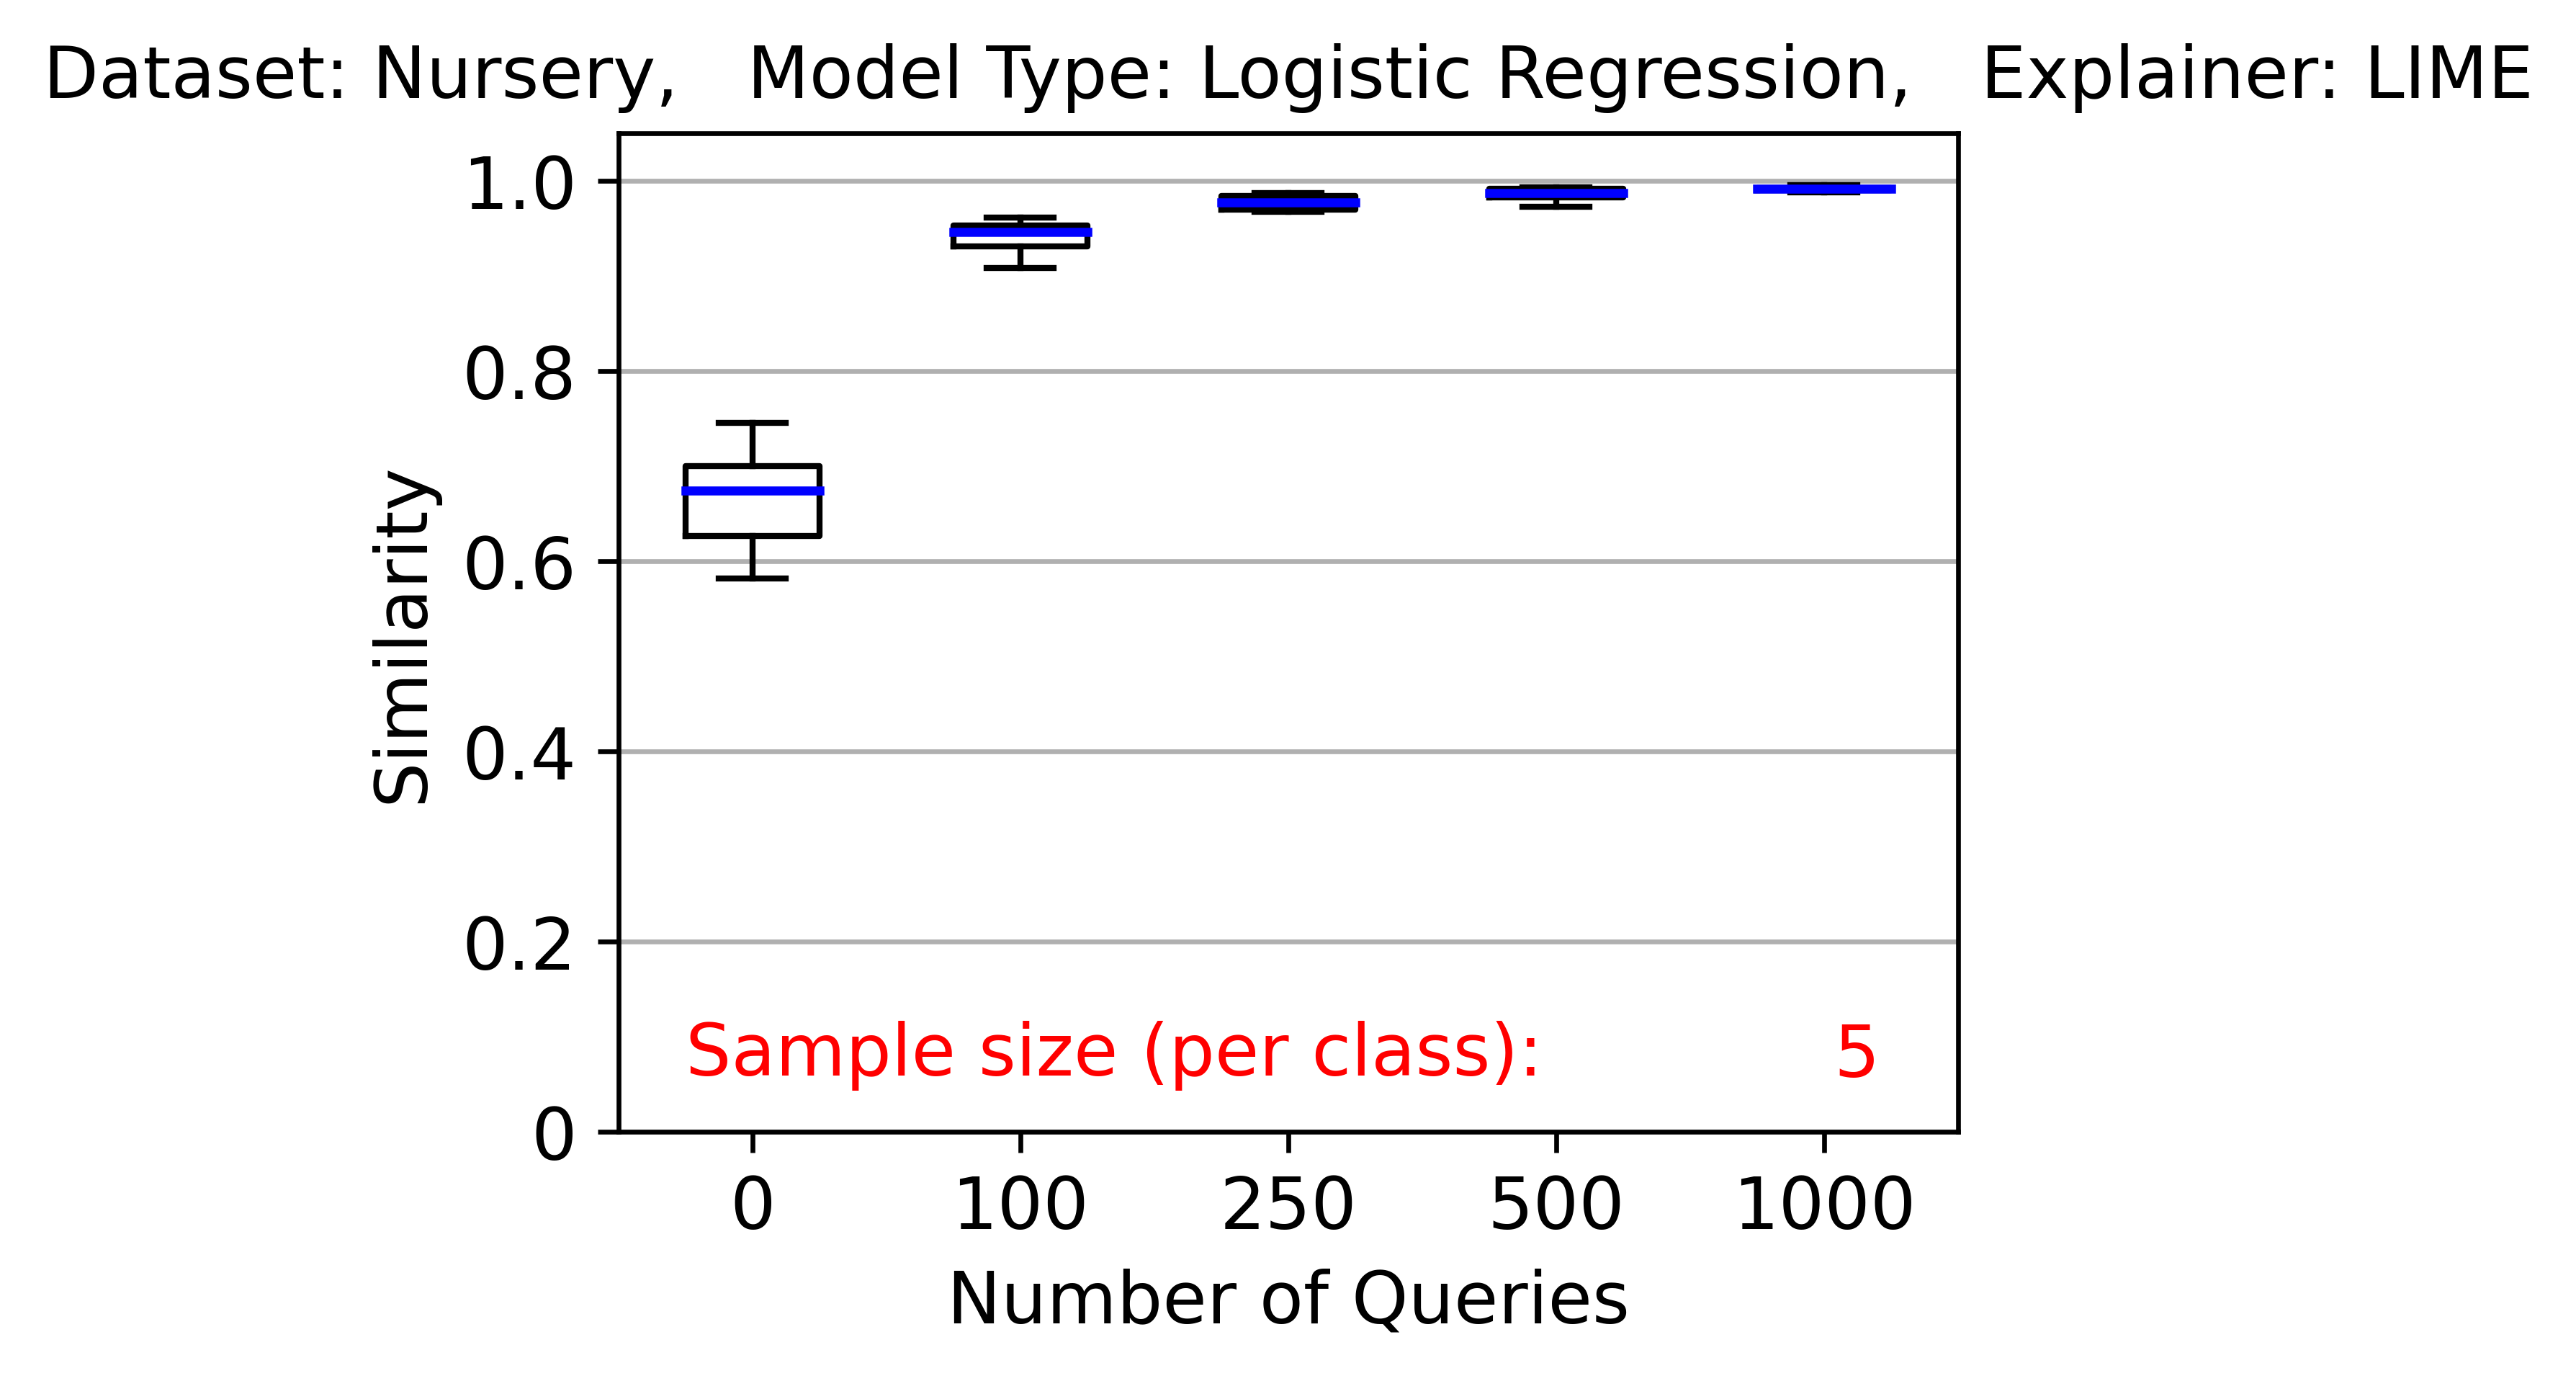

In [6]:
isSim = True # Change this to False for plotting accuracy and True for plotting similarity

x_axis = []
y_axis = [0,0.2,0.4,0.6,0.8,1.0]
dataset_dict, model_dict, exp_dict = load_experiment_dicts()
n = len(sample_set_sizes)
q = len(query_limit)
for i in range(n):
    x_axis += query_limit
tmp = n*q
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
fig, ax = plt.subplots(figsize=(tmp*0.6+1, 3))
plt.title('Dataset: '+dataset_dict.get(which_dataset)+
          ',   Model Type: '+model_dict.get(which_model)+
          ',   Explainer: '+exp_dict.get(explanation_tool), color='black')
medianprops = dict(linewidth=1.5, color='blue')
if isSim:
    ax.boxplot(rtest_sims,0,'',medianprops=medianprops)
else:
    ax.boxplot(accuracies,0,'',medianprops=medianprops)
ax.yaxis.grid(True)
ax.set_xticklabels(x_axis)
if not isSim:
    plt.axhline(y = t_accuracy, color = 'green')
for i in range(n-1):
    plt.axvline(x = q*(i+1)+0.5, color = 'black')

label = 'Sample size (per class): '
plt.annotate(label, 
             (0.75,0.06), 
             textcoords="offset points", # how to position the text
             xytext=(0,0), # distance from text to points (x,y)
             ha='left', fontsize=12, color='red')
for x in range(n):
    label = str(sample_set_sizes[x])
    plt.annotate(label, # this is the text
                 (q*(x+1)+0.1,0.05), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(1,1.3), # distance from text to points (x,y)
                 ha='center', fontsize=12, color='red')
ax.set_ylim(0,1.05)
ax.set_xticklabels(x_axis,fontsize=12)
ax.set_yticklabels(y_axis,fontsize=12)
ax.set_xlabel('Number of Queries', fontsize=12)
if isSim:
    ax.set_ylabel('Similarity', fontsize=12)
else:
    ax.set_ylabel('Accuracy', fontsize=12)
plt.show()

In [7]:
## Uncomment for saving the figures

# if explanation_tool == 0:
#     if isSim:
#         saveAddress = "LIME/plots/" + model_name + "_similarity_" + dataset_name + ".pdf"
#     else:
#         saveAddress = "LIME/plots/" + model_name + "_accuracy_" + dataset_name + ".pdf"
#     fig.savefig(saveAddress, bbox_inches='tight')
# elif explanation_tool == 1:
#     if isSim:
#         saveAddress = "SHAP/plots/" + model_name + "_similarity_" + dataset_name + ".pdf"
#     else:
#         saveAddress = "SHAP/plots/" + model_name + "_accuracy_" + dataset_name + ".pdf"
#     fig.savefig(saveAddress, bbox_inches='tight')